In [105]:
from knn_imputation import knnimputation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Usando raw string para la ruta absoluta
ruta_absoluta = r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_dev_imbalanced.csv"
df_aver = pd.read_csv(ruta_absoluta)

# Imputar los valores faltantes usando KNNImputer
imputer = knnimputation()
df_imputed = imputer.fit_transform(df_aver)
df_imputed = pd.DataFrame(df_imputed, columns=df_aver.columns)

# 3. Guardar el DataFrame resultante en un archivo CSV
ruta_salida = r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_clean_imbalanced.csv"
df_imputed.to_csv(ruta_salida, index=False)


In [106]:
from Problema1.src.preprocesing import OneHotEncoderCustom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

encoder = OneHotEncoderCustom()
ruta_absoluta = r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_clean.csv"
df_clean_one_hot = pd.read_csv(ruta_absoluta)
df_clean_one_hot = encoder.fit_transform(df_clean_one_hot)



Primeras filas del dataset:
    CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
0  63.423148   0.500594        1.473261         23.300222      26.791298   
1  72.906362   0.474808        1.361360         21.336137      29.856233   
2  70.711969   0.481701        1.403003         21.521406      30.582427   
3  73.210206   0.518071        1.427612         22.437077      29.887970   
4  68.348288   0.494520        1.454116         21.150723      28.328197   

   CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  OxygenSaturation  \
0      0.477657     3.434832         2.492852    -10.000000         78.625935   
1      0.481035     2.702433         2.281137     63.084699         80.456292   
2      0.472651     2.786606         2.318029     61.347022         79.131699   
3      0.439511     2.998380         2.149232     64.047169         80.693058   
4      0.475881     2.987601         2.428480     62.197197         81.737990   

   Vascularization  Inflamma

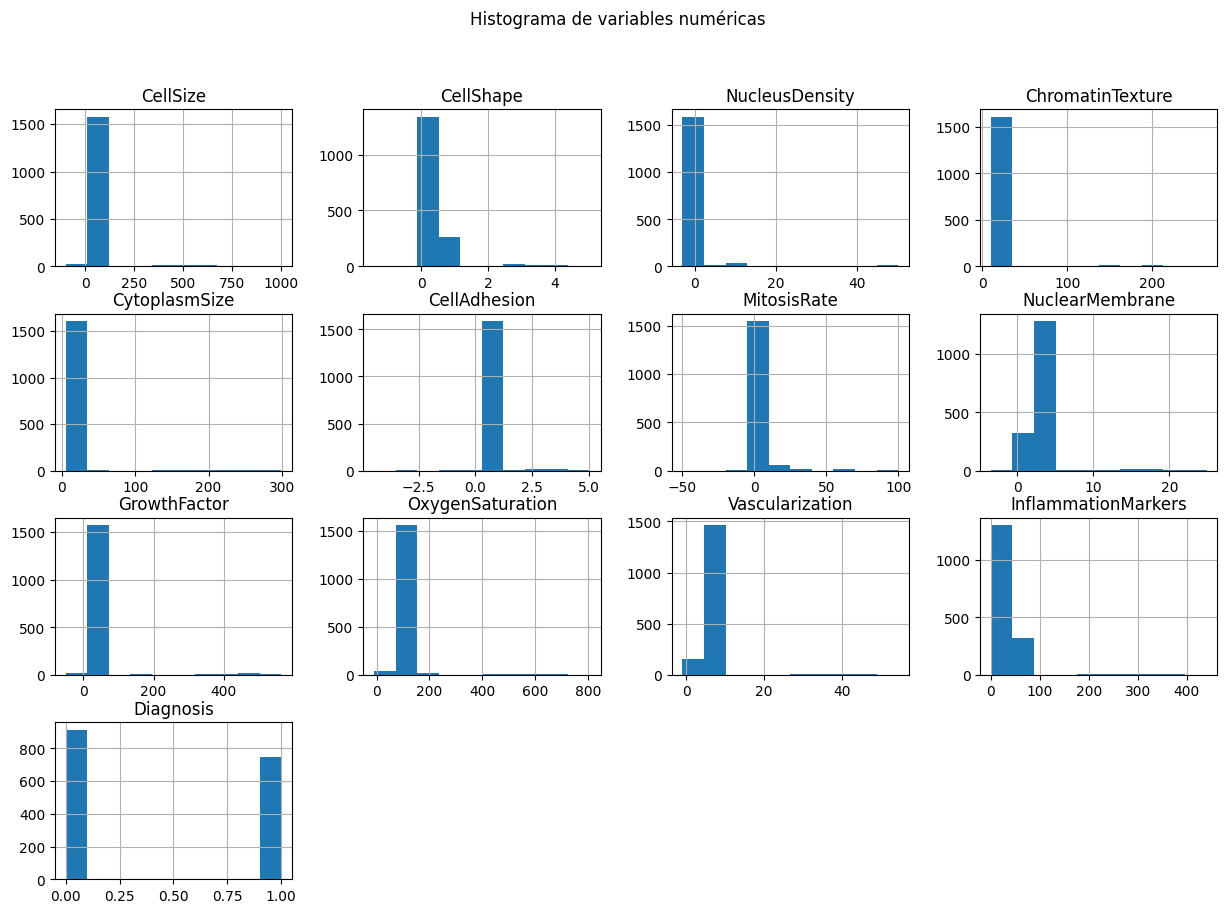

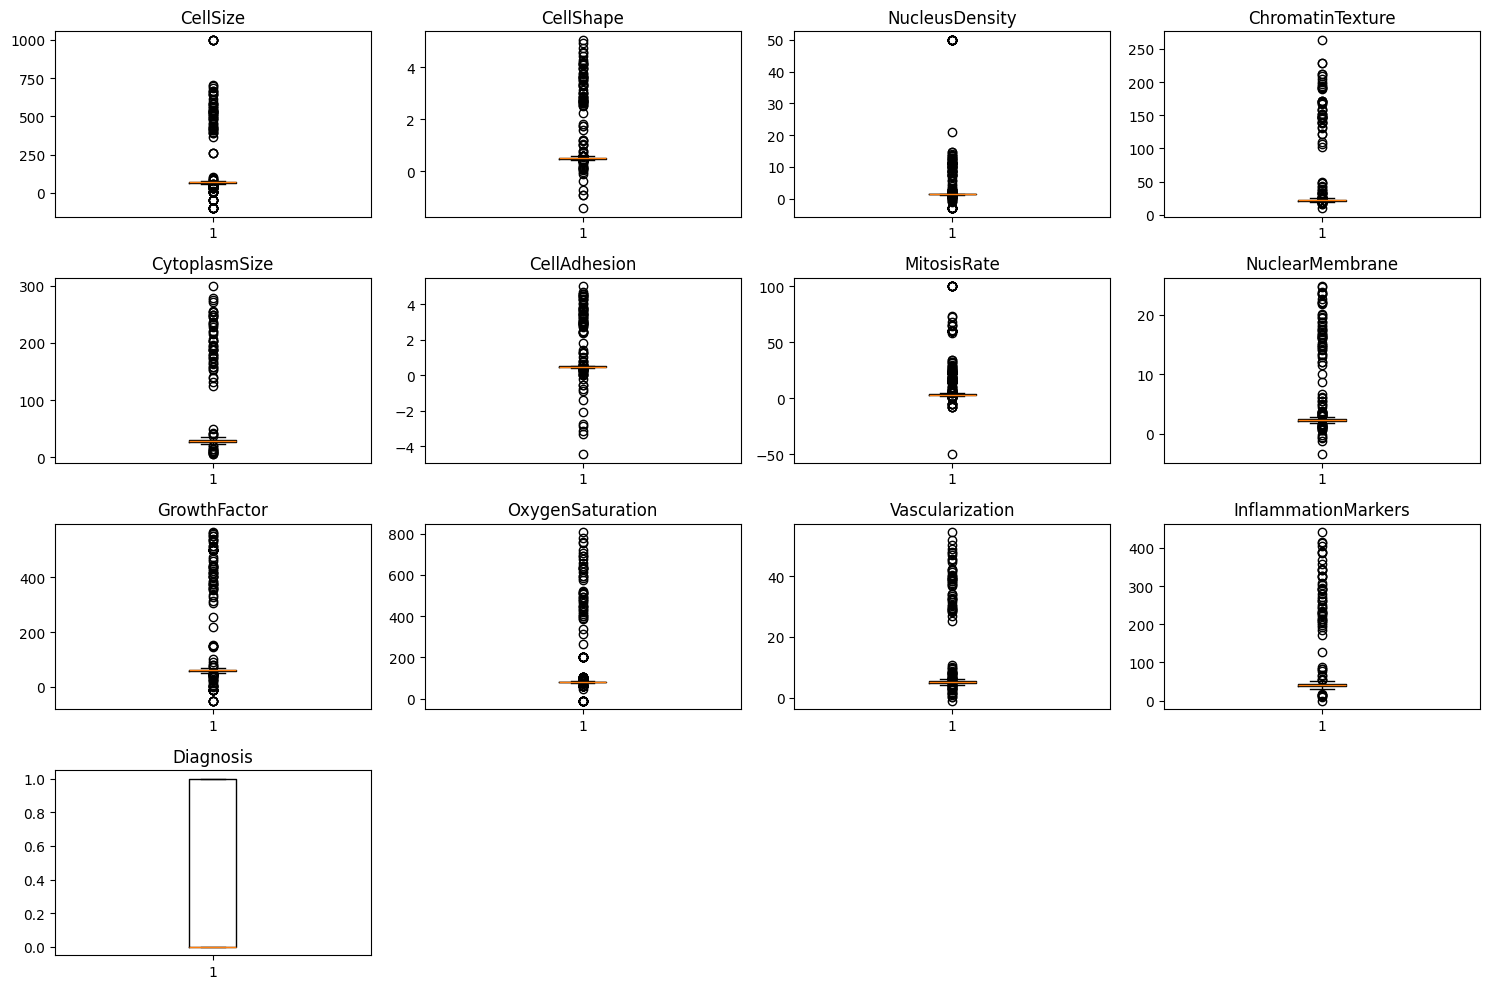


Variables categóricas:
Index([], dtype='object')

Correlación de cada variable con 'Diagnosis':
Diagnosis                 1.000000
CytoplasmSize             0.071340
GrowthFactor              0.070641
CellSize                  0.060557
GeneticMutation_Absnt     0.026429
OxygenSaturation          0.024300
CellShape                 0.016306
CellType_???              0.014540
CellType_Mesnchymal       0.013718
Vascularization           0.008895
ChromatinTexture          0.003003
NucleusDensity            0.000272
CellAdhesion             -0.005088
CellType_Epthlial        -0.021572
GeneticMutation_Presnt   -0.026429
MitosisRate              -0.043226
NuclearMembrane          -0.053870
InflammationMarkers      -0.076268
GeneticMutation_???            NaN
Name: Diagnosis, dtype: float64


In [107]:
df = df_clean_one_hot.copy()

# Visualizar las primeras filas
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación general del dataset:")
print(df.info())

# 2. Detección de valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# 3. Estadísticas descriptivas para conocer los rangos y distribuciones
print("\nEstadísticas descriptivas:")
print(df.describe())

# 4. Visualización de la distribución de variables numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].hist(figsize=(15, 10))
plt.suptitle("Histograma de variables numéricas")
plt.show()

# Boxplots para identificar outliers en variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)  # Ajustar filas/columnas según la cantidad de variables
    plt.boxplot(df[col].dropna())
    plt.title(col)
plt.tight_layout()
plt.show()

# 5. Identificación de variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nVariables categóricas:")
print(categorical_columns)

# Para cada variable categórica, se puede hacer un conteo de frecuencia
for col in categorical_columns:
    print(f"\nFrecuencia de la variable '{col}':")
    print(df[col].value_counts())

# 6. Análisis de correlación con el target (daignosis)

# Si el target es de tipo objeto, convertirlo a numérico (por ejemplo, codificando las categorías)
if df['Diagnosis'].dtype == 'object':
        df['Diagnosis'] = df['Diagnosis'].astype('category').cat.codes

# Calcular la matriz de correlación y extraer la correlación con 'daignosis'
correlations = df.corr()['Diagnosis'].sort_values(ascending=False)
print("\nCorrelación de cada variable con 'Diagnosis':")
print(correlations)


In [108]:
# eliminar la columna GeneticMutation_???

df = df.drop(columns=['GeneticMutation_???'])
# 7. Guardar el DataFrame limpio y preprocesado
ruta_salida = r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_clean_one_hot.csv"
df.to_csv(ruta_salida, index=False)

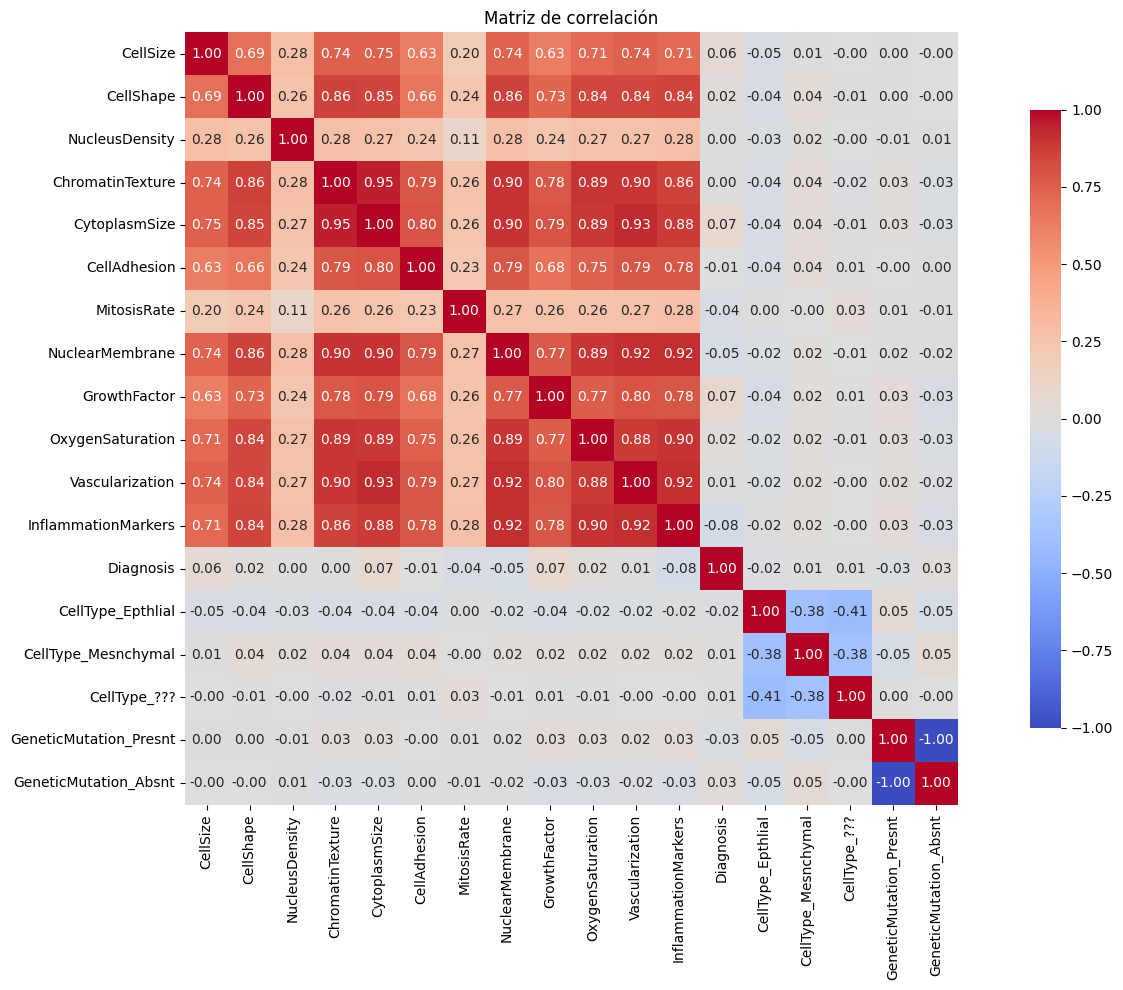

In [109]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

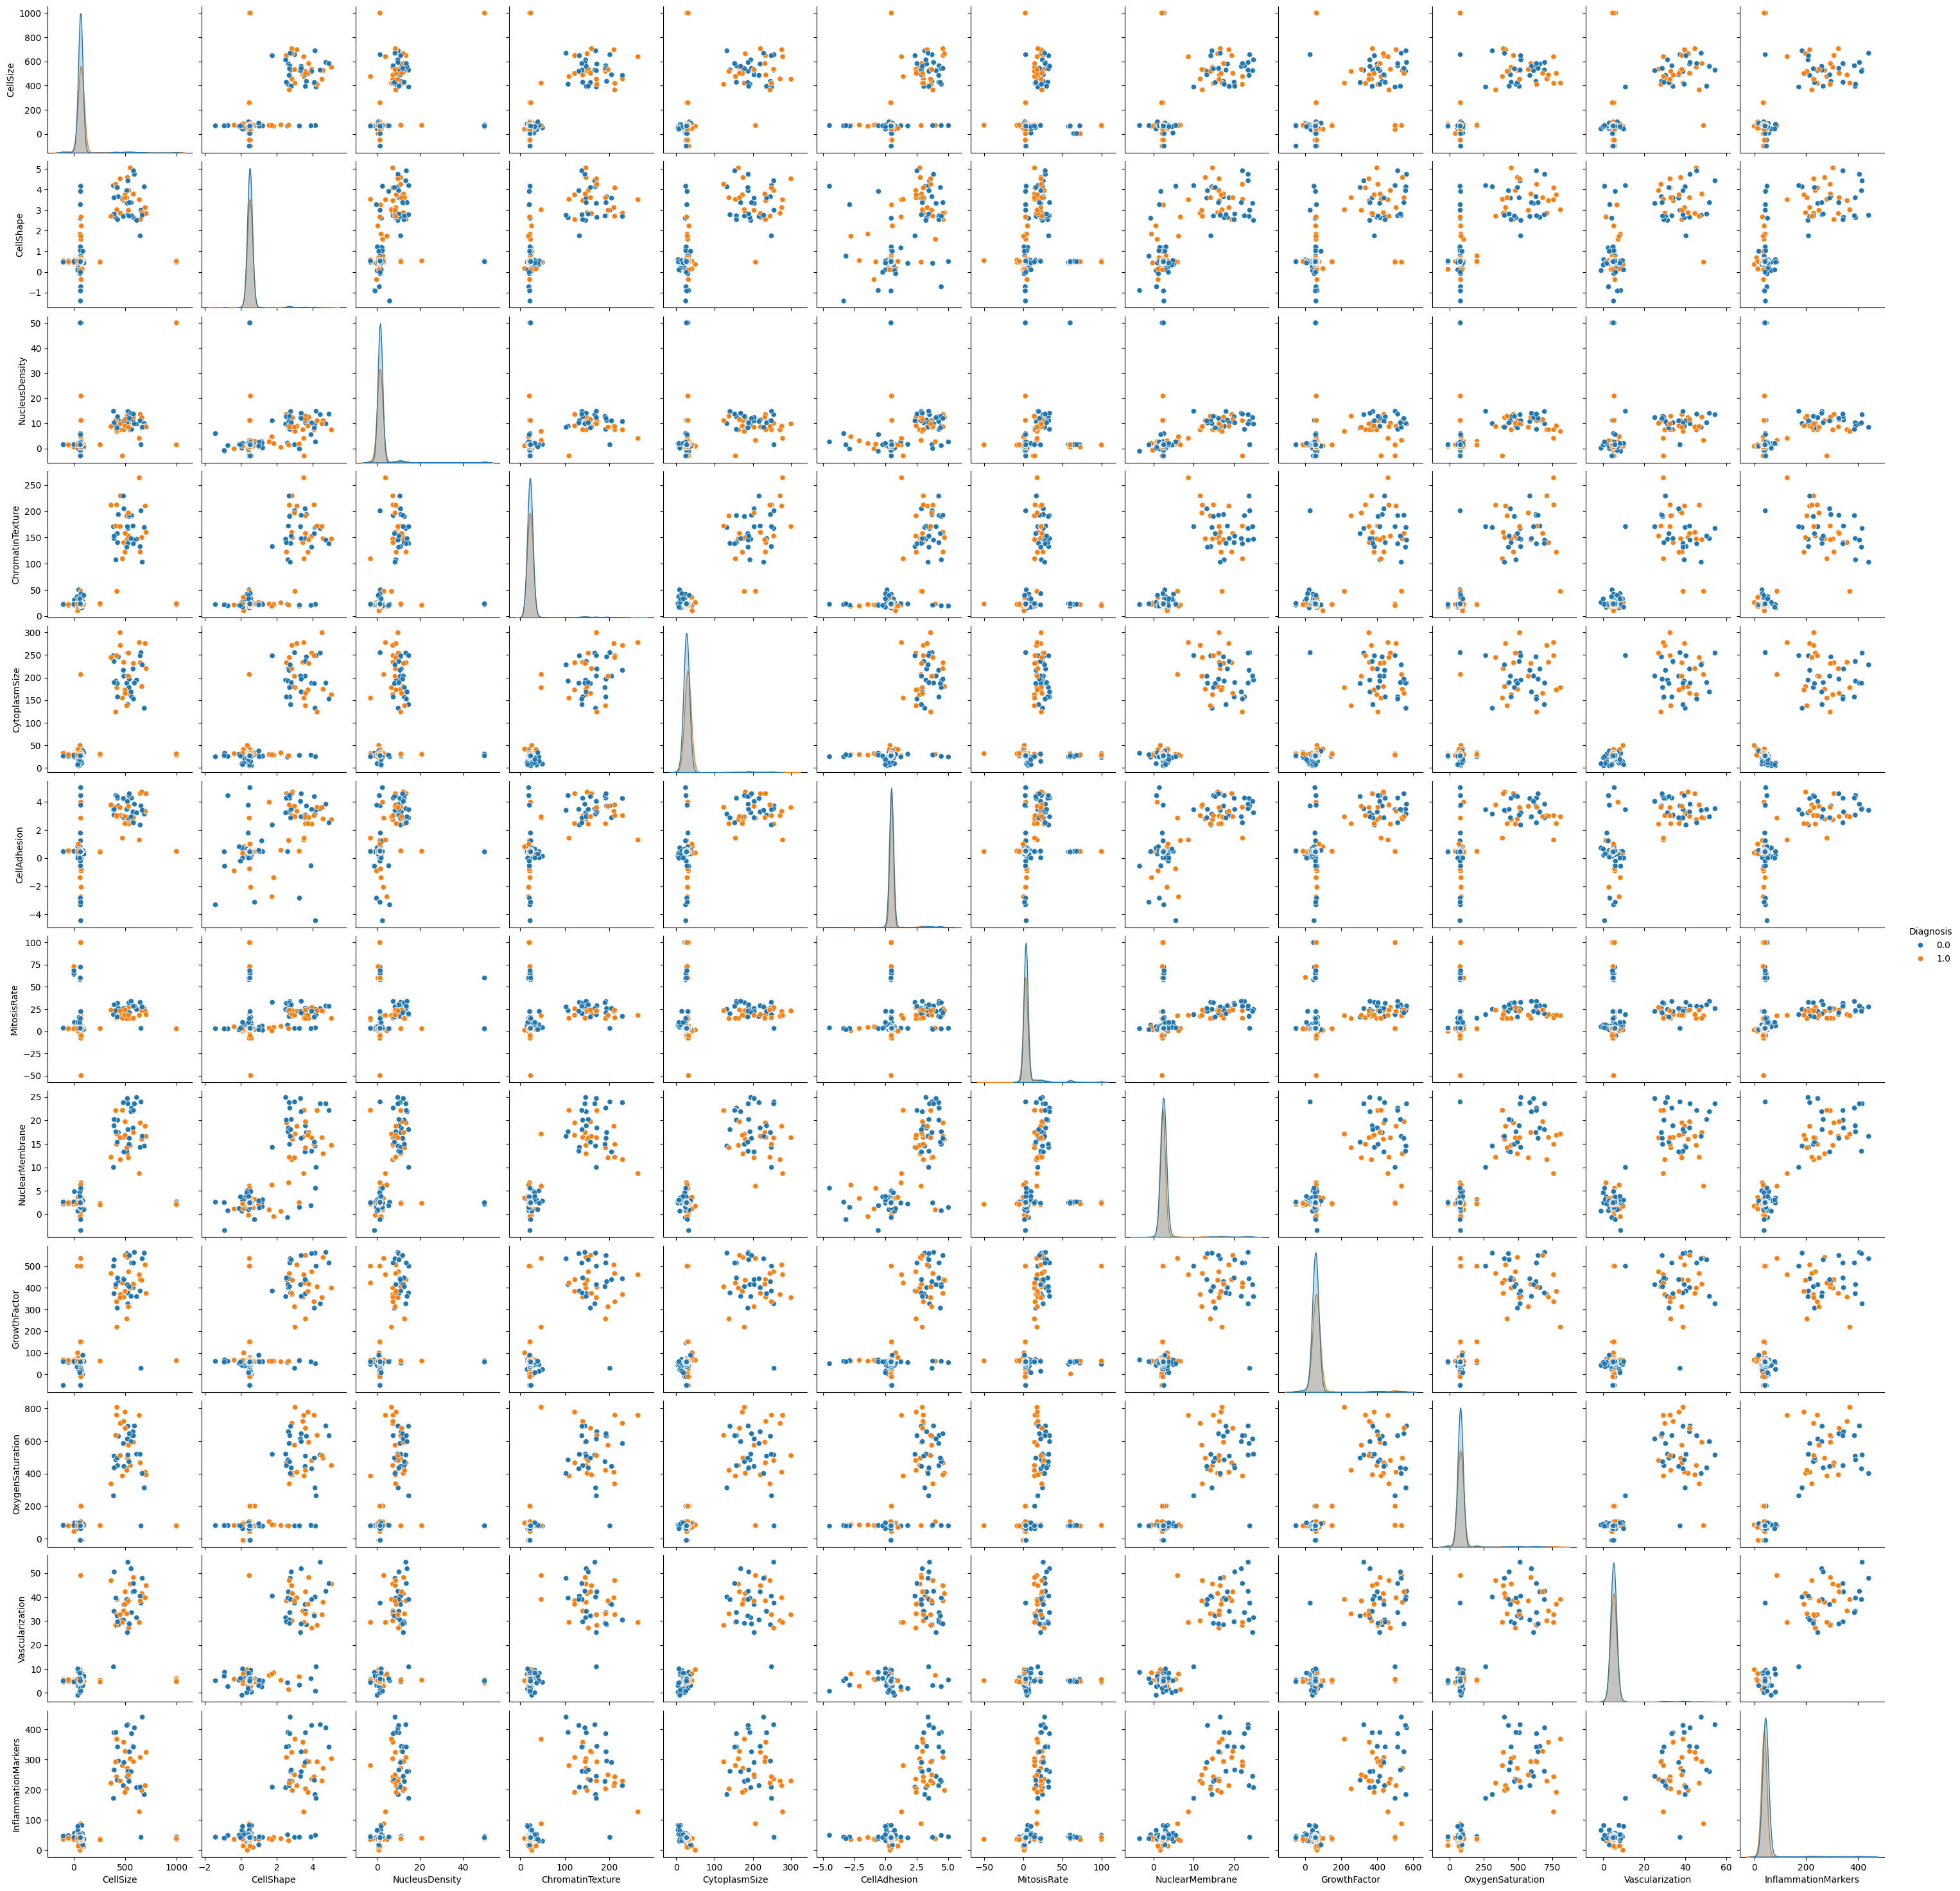

In [110]:

df1 = df.copy()
columnas_one_hot1 = df1.columns[df.columns.str.startswith('GeneticMutation_')].tolist()
columnas_one_hot2 = df1.columns[df.columns.str.startswith('CellType_')].tolist()

x = df1.drop(columns=columnas_one_hot1 + columnas_one_hot2)


#hacer un pairplot de los datos
sns.pairplot(x, hue='Diagnosis', diag_kind='kde')
plt.show()


In [111]:
from Problema1.src.models import LogisticRegressionMulticlass
from Problema1.src.preprocesing import TrainTestSplit
import pandas as pd
import matplotlib.pyplot as plt

df =pd.read_csv(r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_clean_one_hot.csv")

spliter = TrainTestSplit(test_size=0.2, random_state=42, shuffle=False)
x_train, x_test = spliter.split(df)

# Separar las características y la variable objetivo
X_train = x_train.drop(columns=['Diagnosis'])
y_train = x_train['Diagnosis']

X_test = x_test.drop(columns=['Diagnosis'])
y_test = x_test['Diagnosis']



Iteración 0, costo: 15.672164
Iteración 100, costo: 15.598892
Iteración 200, costo: 15.496876
Iteración 300, costo: 15.283361
Iteración 400, costo: 14.586834
Iteración 500, costo: 12.634967
Iteración 600, costo: 4.464833
Iteración 700, costo: 4.143970
Iteración 800, costo: 3.958952
Iteración 900, costo: 15.010364
Iteración 0, costo: 15.781379
Iteración 100, costo: 15.679553
Iteración 200, costo: 15.592410
Iteración 300, costo: 15.355728
Iteración 400, costo: 14.530363
Iteración 500, costo: 12.476296
Iteración 600, costo: 10.791292
Iteración 700, costo: 12.063378
Iteración 800, costo: 4.216206
Iteración 900, costo: 4.009743
Iteración 0, costo: 15.999791
Iteración 100, costo: 15.927217
Iteración 200, costo: 15.800553
Iteración 300, costo: 15.480241
Iteración 400, costo: 14.978299
Iteración 500, costo: 13.510326
Iteración 600, costo: 12.307851
Iteración 700, costo: 4.351342
Iteración 800, costo: 4.048400
Iteración 900, costo: 15.892072
Iteración 0, costo: 15.808679
Iteración 100, costo: 1

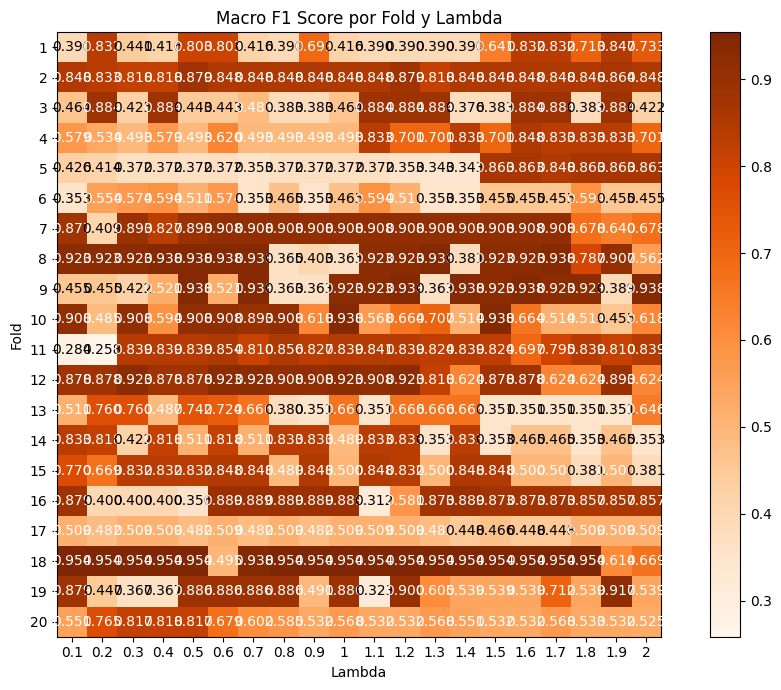

In [112]:
from Problema1.src.crossval import cross_validate_lambda_f1

lambdas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,1.7, 1.8, 1.9, 2]
scores = cross_validate_lambda_f1(LogisticRegressionMulticlass, X_train, y_train, lambdas, verbose=True)

In [113]:
model = LogisticRegressionMulticlass(reg_lambda=1.7, n_iters=10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_scores = model.predict_proba(X_test)
#solo ver la probabilidad de la clase 1
y_scores = y_scores[:, 1]
print(y_scores)

[1.47982064e-017 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.03238930e-011 9.37091583e-055 9.99984859e-001 1.00000000e+000
 9.99465515e-001 1.43362951e-022 1.00000000e+000 7.64057349e-026
 1.00000000e+000 1.00000000e+000 1.00000000e+000 4.08461048e-023
 1.36203762e-012 6.03953683e-010 1.79888755e-012 1.00000000e+000
 6.07333608e-047 3.59733976e-014 1.01959682e-147 1.41603111e-032
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 2.00745972e-026 1.31653320e-012 1.51514006e-041 2.07675696e-020
 1.00000000e+000 1.00000000e+000 9.99999869e-001 2.78972371e-023
 3.57137521e-008 1.00000000e+000 1.00000000e+000 5.80453525e-031
 1.00000000e+000 1.56501461e-019 1.00000000e+000 1.00000000e+000
 6.21629748e-011 6.14999606e-025 1.00000000e+000 1.00000000e+000
 1.50205285e-015 1.51230719e-024 1.00000000e+000 1.00000000e+000
 2.59661658e-011 2.27997290e-018 2.56081472e-030 4.91633702e-033
 9.94894929e-001 7.97467022e-001 5.30483043e-036 1.10264294e-032
 9.04223166e-013 1.000000

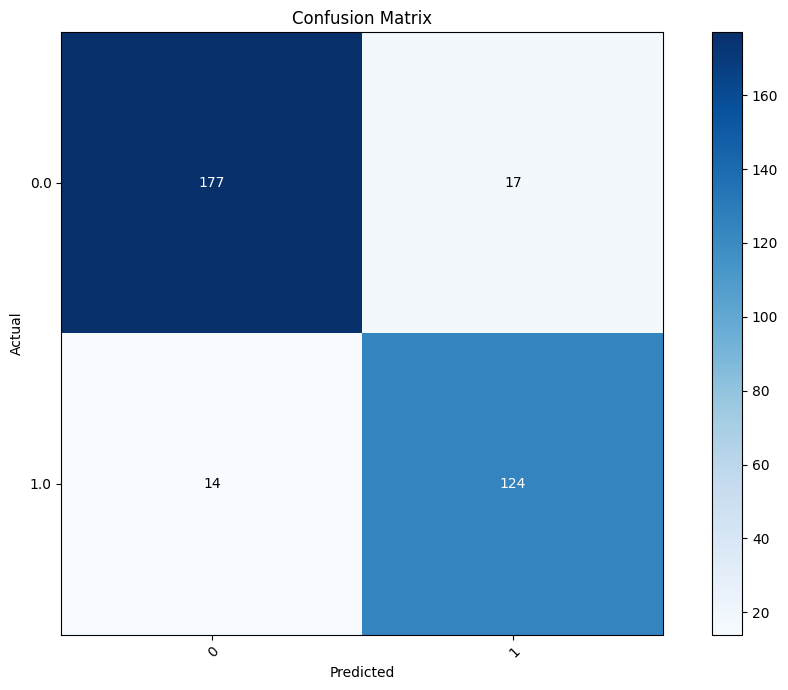

In [114]:
import numpy as np

#Crear la matriz de confusión sin usar sklearn (sin márgenes)
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False)

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 7))

# Mostrar la matriz como una imagen (heatmap) con el cmap "Blues"
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Añadir una barra de color
cbar = ax.figure.colorbar(im, ax=ax)

# Configurar los ticks con las etiquetas de las clases
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=cm.columns,
       yticklabels=cm.index,
       ylabel='Actual',
       xlabel='Predicted')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Anotar cada celda con su valor
thresh = cm.values.max() / 2.  # umbral para cambiar el color del texto
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm.values[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm.values[i, j] > thresh else "black")

ax.set_title("Confusion Matrix")
fig.tight_layout()
plt.show()

Accuracy: 0.9066
Precision: 0.8794
Recall: 0.8986
F1 Score: 0.8889
ROC AUC: 0.5000


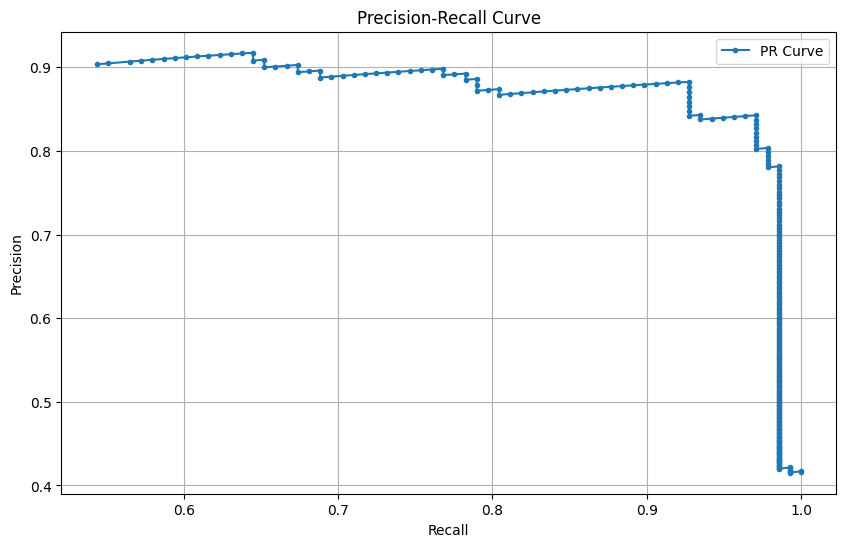

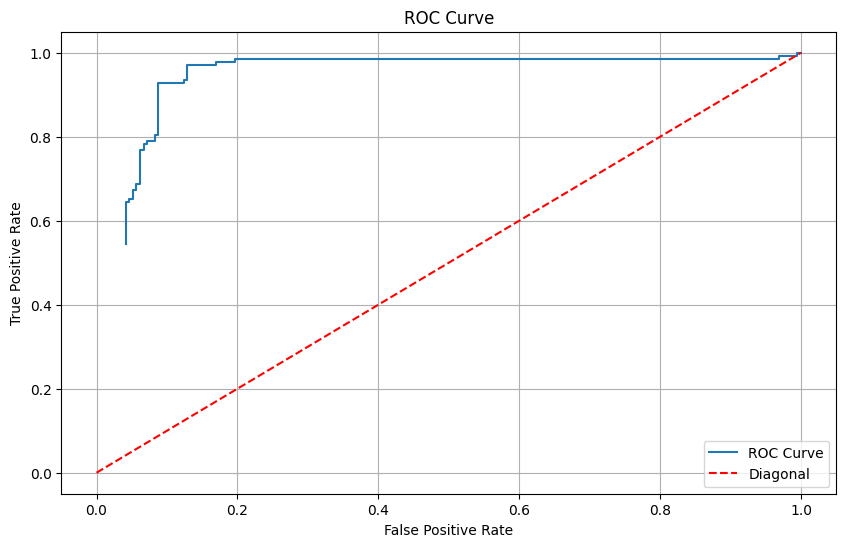

In [115]:
from Problema1.src.metrics import (
    compute_accuracy, compute_precision, compute_recall, compute_f1,
    compute_precision_recall_curve, compute_roc_curve, compute_auc
)
import matplotlib.pyplot as plt

# Calcular métricas básicas
accuracy = compute_accuracy(y_test, y_pred)
precision_metric = compute_precision(y_test, y_pred)
recall_metric = compute_recall(y_test, y_pred)
f1_metric = compute_f1(y_test, y_pred)
roc_auc = compute_auc(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision_metric:.4f}")
print(f"Recall: {recall_metric:.4f}")
print(f"F1 Score: {f1_metric:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Calcular la curva Precision-Recall
precision_curve, recall_curve, pr_thresholds = compute_precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(10, 6))
plt.plot(recall_curve, precision_curve, marker='.', label='PR Curve')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()

# Calcular la curva ROC
fpr, tpr, roc_thresholds = compute_roc_curve(y_test, y_scores)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve')
# Agregar la recta diagonal de (0,0) a (1,1)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Diagonal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

    


In [116]:
ruta = r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_test.csv"
df_test = pd.read_csv(ruta)

df_test = imputer.fit_transform(df_test)

df_test = encoder.fit_transform(df_test)
df_test = df_test.drop(columns=['GeneticMutation_???'])
# Separar las características y la variable objetivo
X_test = df_test.drop(columns=['Diagnosis'])
y_test = df_test['Diagnosis']
y_pred_test = model.predict(X_test)
y_scores_test = model.predict_proba(X_test)
y_scores_test = y_scores_test[:, 1]



Accuracy: 0.8973
Precision: 0.8902
Recall: 0.8795
F1 Score: 0.8848
ROC AUC: 0.0002


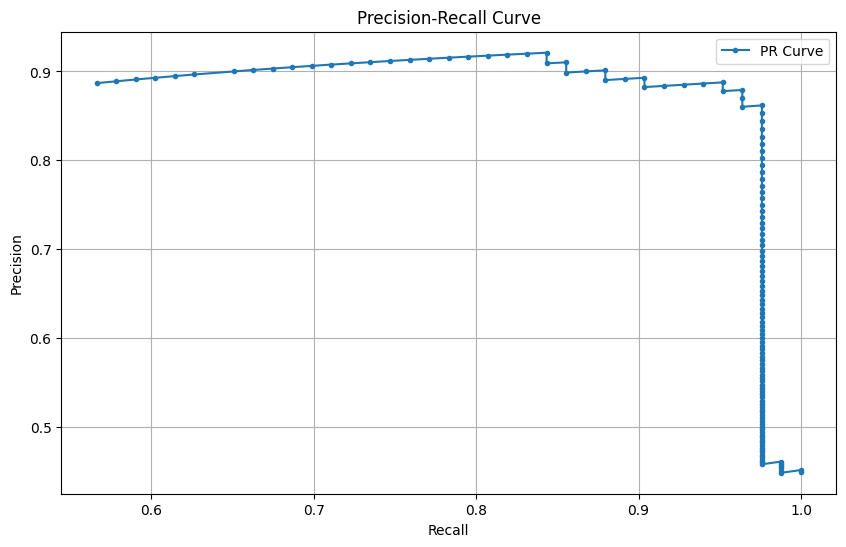

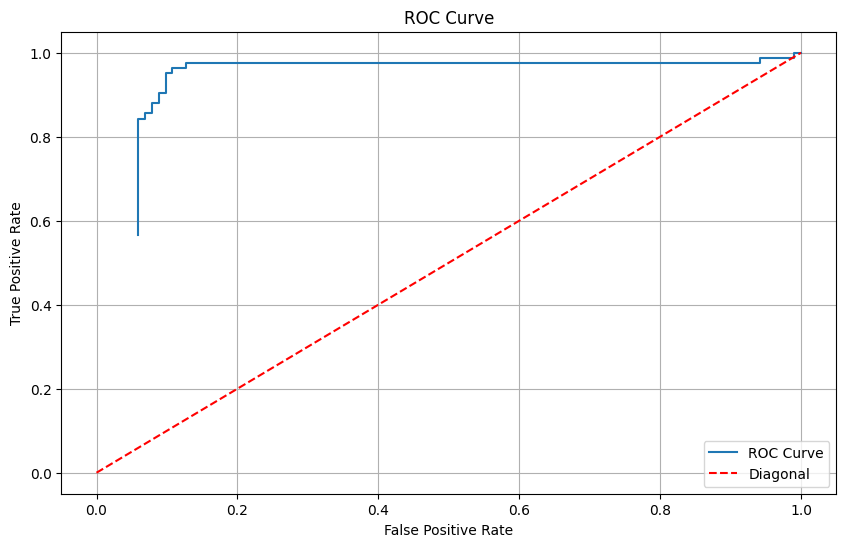

In [117]:
# Calcular métricas básicas
accuracy = compute_accuracy(y_test, y_pred_test)
precision_metric = compute_precision(y_test, y_pred_test)
recall_metric = compute_recall(y_test, y_pred_test)
f1_metric = compute_f1(y_test, y_pred_test)
roc_auc = compute_auc(y_test, y_scores_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision_metric:.4f}")
print(f"Recall: {recall_metric:.4f}")
print(f"F1 Score: {f1_metric:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Calcular la curva Precision-Recall
precision_curve, recall_curve, pr_thresholds = compute_precision_recall_curve(y_test, y_scores_test)
plt.figure(figsize=(10, 6))
plt.plot(recall_curve, precision_curve, marker='.', label='PR Curve')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()

# Calcular la curva ROC
fpr, tpr, roc_thresholds = compute_roc_curve(y_test, y_scores_test)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve')
# Agregar la recta diagonal de (0,0) a (1,1)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Diagonal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

In [192]:
import pandas as pd
ruta =r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_dev_imbalanced.csv"

df_imbalanced = pd.read_csv(ruta)
df_imbalanced_clean = imputer.fit_transform(df_imbalanced)
df_imbalanced_clean = pd.DataFrame(df_imbalanced_clean, columns=df_imbalanced.columns)

df_imbalanced_one_hot = encoder.fit_transform(df_imbalanced_clean)
df_imbalanced_one_hot = df_imbalanced_one_hot.drop(columns=['GeneticMutation_???'])
# Separar las características y la variable objetivo

x_train_imbalanced, x_test_imbalanced = spliter.split(df_imbalanced_one_hot)

y_train_imbalanced = x_train_imbalanced['Diagnosis']
y_test_imbalanced = x_test_imbalanced['Diagnosis']

x_train_imbalanced = x_train_imbalanced.drop(columns=['Diagnosis'])
x_test_imbalanced = x_test_imbalanced.drop(columns=['Diagnosis'])

Iteración 0, costo: 8.794368
Iteración 100, costo: 24.897628
Iteración 200, costo: 8.843596
Iteración 300, costo: 8.825757
Iteración 400, costo: 8.925445
Iteración 500, costo: 8.860907
Iteración 600, costo: 4.540051
Iteración 700, costo: 4.022839
Iteración 800, costo: 8.319838
Iteración 900, costo: 8.629852
Iteración 0, costo: 8.719969
Iteración 100, costo: 8.673079
Iteración 200, costo: 24.328261
Iteración 300, costo: 4.022490
Iteración 400, costo: 8.808336
Iteración 500, costo: 4.503461
Iteración 600, costo: 5.290275
Iteración 700, costo: 4.032266
Iteración 800, costo: 8.803912
Iteración 900, costo: 4.202555
Iteración 0, costo: 8.794462
Iteración 100, costo: 8.822524
Iteración 200, costo: 4.469767
Iteración 300, costo: 8.847226
Iteración 400, costo: 22.185273
Iteración 500, costo: 7.789135
Iteración 600, costo: 3.918468
Iteración 700, costo: 11.916153
Iteración 800, costo: 18.413914
Iteración 900, costo: 6.357756
Iteración 0, costo: 8.868958
Iteración 100, costo: 8.294966
Iteración 2

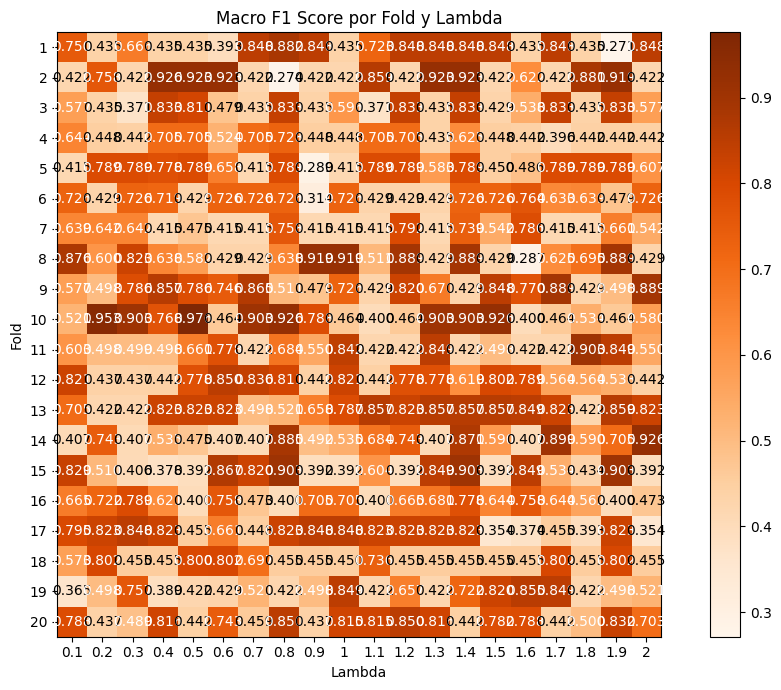

In [138]:
#1.4 
from Problema1.src.crossval import cross_validate_lambda_f1
#busqueda del lambda optimo
lambdas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,1.7, 1.8, 1.9, 2]
scores = cross_validate_lambda_f1(LogisticRegressionMulticlass, x_train_imbalanced, y_train_imbalanced, lambdas, verbose=True)

In [184]:
#1) desbalanceado
modelo_desbalanceado = LogisticRegressionMulticlass(reg_lambda=1.4, n_iters=10000)
modelo_desbalanceado.fit(x_train_imbalanced, y_train_imbalanced)

y_pred_imbalanced = modelo_desbalanceado.predict(x_test_imbalanced)
y_scores_imbalanced = modelo_desbalanceado.predict_proba(x_test_imbalanced)
y_scores_imbalanced = y_scores_imbalanced[:, 1]




Iteración 0, costo: 17.195984
Iteración 100, costo: 17.072449
Iteración 200, costo: 15.188202
Iteración 300, costo: 12.897136
Iteración 400, costo: 13.710255
Iteración 500, costo: 14.995190
Iteración 600, costo: 13.704259
Iteración 700, costo: 13.271677
Iteración 800, costo: 13.607319
Iteración 900, costo: 13.215184
Iteración 0, costo: 17.093000
Iteración 100, costo: 16.763667
Iteración 200, costo: 16.484009
Iteración 300, costo: 16.385705
Iteración 400, costo: 15.539033
Iteración 500, costo: 14.768772
Iteración 600, costo: 13.042668
Iteración 700, costo: 5.223857
Iteración 800, costo: 4.945643
Iteración 900, costo: 5.058560
Iteración 0, costo: 17.269329
Iteración 100, costo: 17.132424
Iteración 200, costo: 16.627896
Iteración 300, costo: 16.575350
Iteración 400, costo: 16.385415
Iteración 500, costo: 15.696601
Iteración 600, costo: 14.884534
Iteración 700, costo: 14.060201
Iteración 800, costo: 14.465403
Iteración 900, costo: 4.868065
Iteración 0, costo: 17.467263
Iteración 100, costo

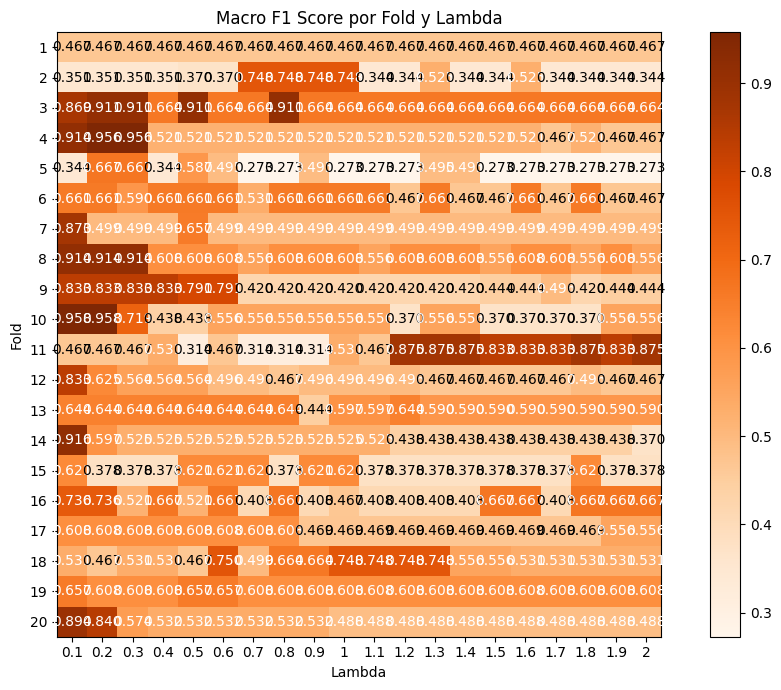

In [171]:
#2) undersampling
from Problema1.src.re_sample import random_undersample

# Aplicar undersampling
X_train_undersampled, y_train_undersampled = random_undersample(x_train_imbalanced, y_train_imbalanced)

#busqueda del lambda optimo
lambdas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,1.7, 1.8, 1.9, 2]

scores = cross_validate_lambda_f1(LogisticRegressionMulticlass, X_train_undersampled, y_train_undersampled, lambdas, verbose=True)


In [217]:

model_undersampled = LogisticRegressionMulticlass(reg_lambda=0.1, n_iters=10000)
model_undersampled.fit(X_train_undersampled, y_train_undersampled)

y_pred_undersampled = model_undersampled.predict(x_test_imbalanced)
y_scores_undersampled = model_undersampled.predict_proba(x_test_imbalanced)
y_scores_undersampled = y_scores_undersampled[:, 1]




Iteración 0, costo: 12.240001
Iteración 100, costo: 16.754572
Iteración 200, costo: 16.570624
Iteración 300, costo: 16.391175
Iteración 400, costo: 14.868384
Iteración 500, costo: 4.457274
Iteración 600, costo: 4.279187
Iteración 700, costo: 4.290149
Iteración 800, costo: 15.616773
Iteración 900, costo: 13.036583
Iteración 0, costo: 16.455915
Iteración 100, costo: 16.894868
Iteración 200, costo: 16.722082
Iteración 300, costo: 16.512255
Iteración 400, costo: 14.948378
Iteración 500, costo: 12.362040
Iteración 600, costo: 4.467313
Iteración 700, costo: 4.412075
Iteración 800, costo: 16.137280
Iteración 900, costo: 13.623970
Iteración 0, costo: 11.579228
Iteración 100, costo: 16.829765
Iteración 200, costo: 16.620846
Iteración 300, costo: 16.514664
Iteración 400, costo: 15.131696
Iteración 500, costo: 12.778983
Iteración 600, costo: 4.370435
Iteración 700, costo: 4.272657
Iteración 800, costo: 16.752113
Iteración 900, costo: 15.673118
Iteración 0, costo: 9.087092
Iteración 100, costo: 16

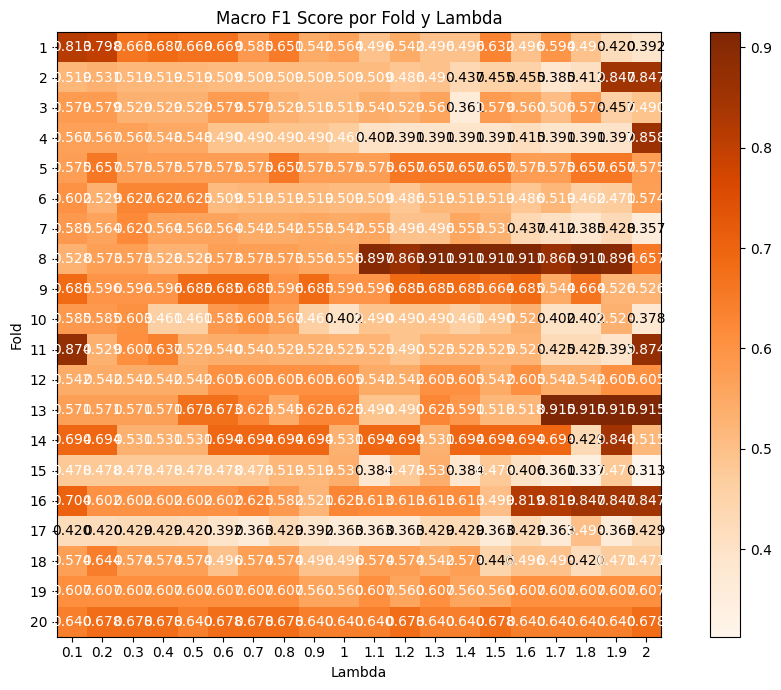

In [173]:
from Problema1.src.re_sample import random_oversample

# Aplicar oversampling
X_train_oversampled, y_train_oversampled = random_oversample(x_train_imbalanced, y_train_imbalanced)
#busqueda del lambda optimo
lambdas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,1.7, 1.8, 1.9, 2]
scores = cross_validate_lambda_f1(LogisticRegressionMulticlass, X_train_oversampled, y_train_oversampled, lambdas, verbose=True)

In [186]:

modelo_oversampled = LogisticRegressionMulticlass(reg_lambda=0.1, n_iters=10000)

modelo_oversampled.fit(X_train_oversampled, y_train_oversampled)

y_pred_oversampled = modelo_oversampled.predict(x_test_imbalanced)
y_scores_oversampled = modelo_oversampled.predict_proba(x_test_imbalanced)
y_scores_oversampled = y_scores_oversampled[:, 1]


Iteración 0, costo: 17.018799
Iteración 100, costo: 16.877924
Iteración 200, costo: 16.391391
Iteración 300, costo: 16.006029
Iteración 400, costo: 14.101842
Iteración 500, costo: 8.799861
Iteración 600, costo: 3.817665
Iteración 700, costo: 15.971960
Iteración 800, costo: 13.399752
Iteración 900, costo: 3.760685
Iteración 0, costo: 5.735563
Iteración 100, costo: 17.089601
Iteración 200, costo: 16.687254
Iteración 300, costo: 16.123571
Iteración 400, costo: 14.265650
Iteración 500, costo: 11.875134
Iteración 600, costo: 10.635587
Iteración 700, costo: 10.995049
Iteración 800, costo: 10.988014
Iteración 900, costo: 10.895617
Iteración 0, costo: 16.994722
Iteración 100, costo: 17.022556
Iteración 200, costo: 16.514388
Iteración 300, costo: 16.162920
Iteración 400, costo: 13.691527
Iteración 500, costo: 3.784109
Iteración 600, costo: 3.871591
Iteración 700, costo: 16.386904
Iteración 800, costo: 14.685979
Iteración 900, costo: 11.946855
Iteración 0, costo: 15.238987
Iteración 100, costo: 

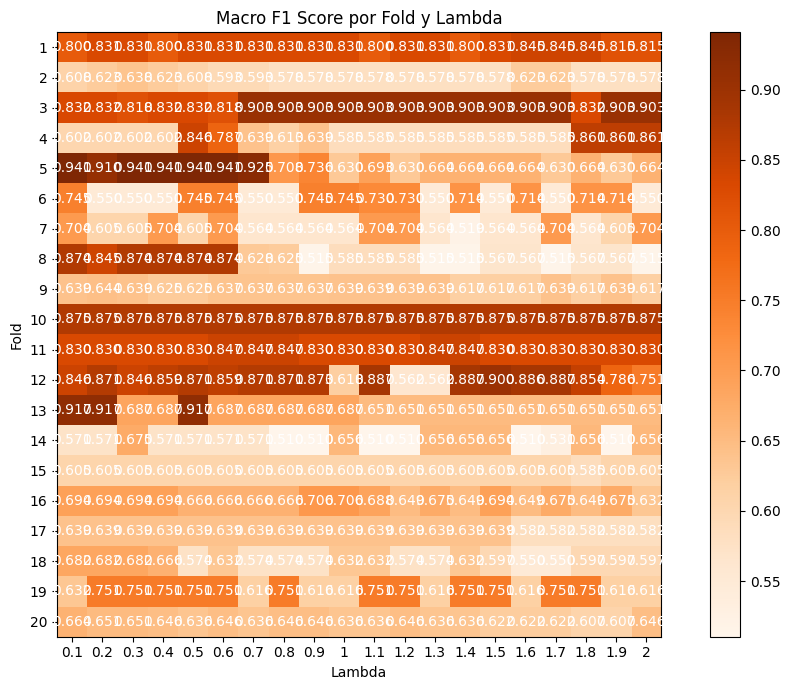

In [176]:
from Problema1.src.re_sample import smote_oversample
# Aplicar SMOTE oversampling
X_train_smote, y_train_smote = smote_oversample(x_train_imbalanced, y_train_imbalanced)
#busqueda del lambda optimo
lambdas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,1.7, 1.8, 1.9, 2]
scores = cross_validate_lambda_f1(LogisticRegressionMulticlass, X_train_smote, y_train_smote, lambdas, verbose=True)

In [218]:
modelo_smote = LogisticRegressionMulticlass(reg_lambda=0.5, n_iters=10000)
modelo_smote.fit(X_train_smote, y_train_smote)

x_test_smote = x_test_imbalanced.copy()
x_test_smote, y_test_smote = smote_oversample(x_test_smote, y_test_imbalanced)


y_pred_smote = modelo_smote.predict(x_test_imbalanced)
y_scores_smote = modelo_smote.predict_proba(x_test_imbalanced)
y_scores_smote = y_scores_smote[:, 1]


Iteración 0, costo: 21.277910
Iteración 100, costo: 27.246199
Iteración 200, costo: 30.703653
Iteración 300, costo: 34.553189
Iteración 400, costo: 37.170478
Iteración 500, costo: 37.454147
Iteración 600, costo: 35.136305
Iteración 700, costo: 38.111539


c:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\src\models.py:145: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteración 800, costo: 37.776339
Iteración 900, costo: 38.442012
Iteración 0, costo: 25.420287
Iteración 100, costo: 27.280174
Iteración 200, costo: 30.345225
Iteración 300, costo: 34.173907
Iteración 400, costo: 36.944281
Iteración 500, costo: 37.776568
Iteración 600, costo: 38.645057
Iteración 700, costo: 39.048751
Iteración 800, costo: 36.952832
Iteración 900, costo: 39.115035
Iteración 0, costo: 25.317526
Iteración 100, costo: 27.507046
Iteración 200, costo: 30.764983
Iteración 300, costo: 34.561020
Iteración 400, costo: 37.267745
Iteración 500, costo: 37.753842
Iteración 600, costo: 38.130002
Iteración 700, costo: 20.969695
Iteración 800, costo: 15.978338
Iteración 900, costo: 12.088499
Iteración 0, costo: 25.705080
Iteración 100, costo: 27.426554
Iteración 200, costo: 30.364854
Iteración 300, costo: 34.274533
Iteración 400, costo: 36.873294
Iteración 500, costo: 37.891046
Iteración 600, costo: 38.122157
Iteración 700, costo: 20.116388
Iteración 800, costo: 35.011227
Iteración 900,

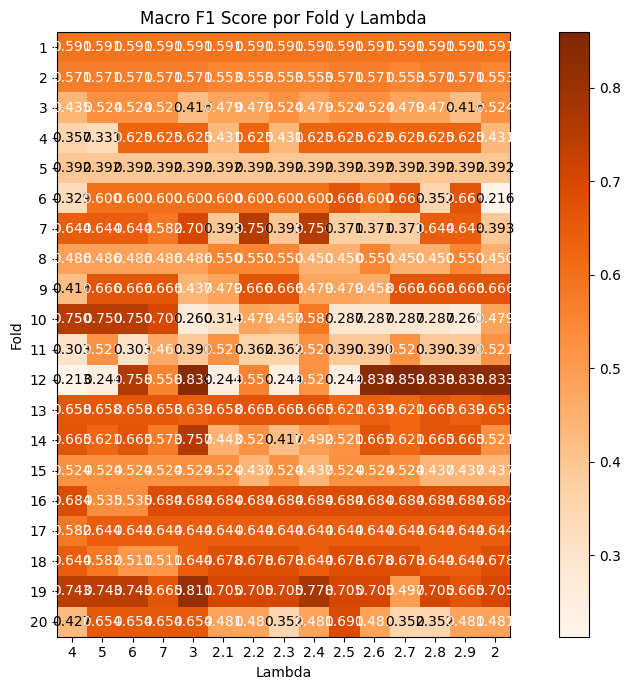

In [178]:
from Problema1.src.models import LogisticRegressionCostReweighted
from Problema1.src.crossval import cross_validate_lambda_f1

#busqueda del lambda optimo
lambdas = [4,5,6,7,3, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,2.7, 2.8, 2.9, 2]
scores = cross_validate_lambda_f1(LogisticRegressionCostReweighted, x_train_imbalanced, y_train_imbalanced, lambdas, verbose=True)

In [179]:
model_re_weighted = LogisticRegressionCostReweighted(reg_lambda=6, n_iters=10000)
model_re_weighted.fit(x_train_imbalanced, y_train_imbalanced)

y_pred_re_weighted = model_re_weighted.predict(x_test_imbalanced)
y_scores_re_weighted = model_re_weighted.predict_proba(x_test_imbalanced)
#y_scores_re_weighted = y_scores_re_weighted[:, 1]

c:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\src\models.py:145: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


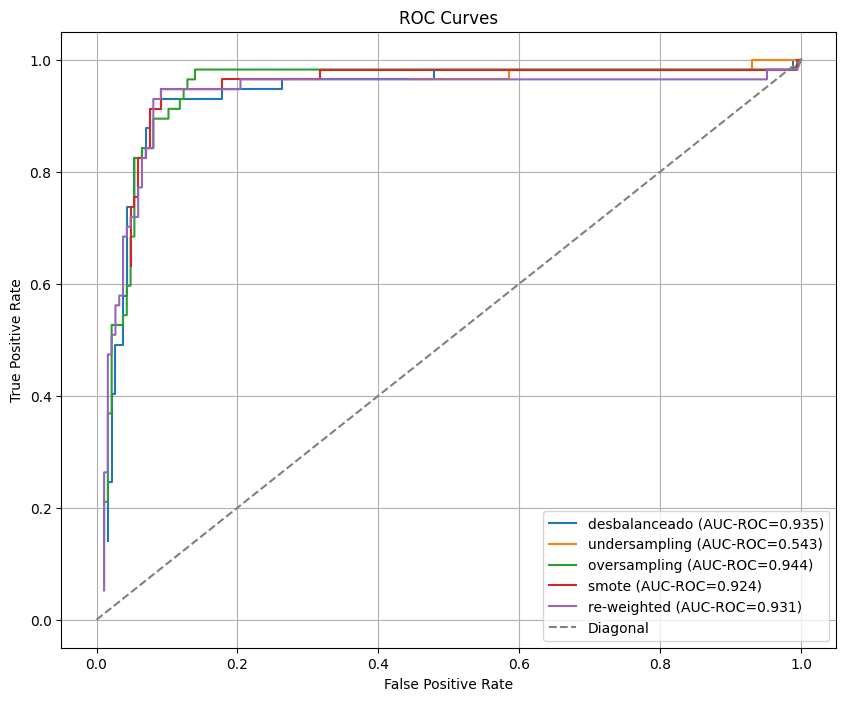

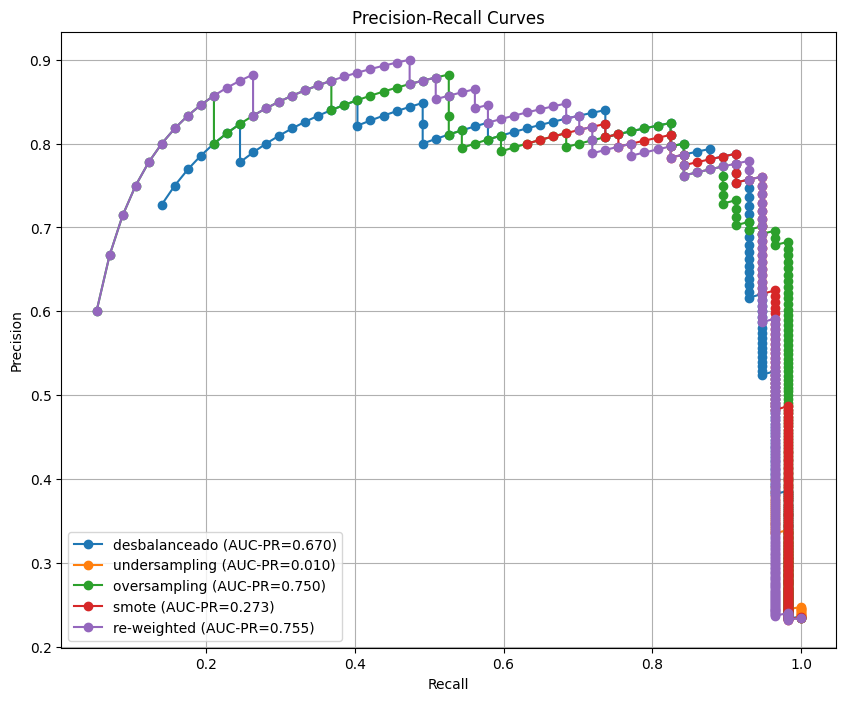

Performance Metrics for each model:
               Accuracy  Precision    Recall  F1 Score   AUC-ROC    AUC-PR
desbalanceado  0.905350   0.840000  0.736842  0.785047  0.934635  0.670308
undersampling  0.345679   0.261682  0.982456  0.413284  0.542822  0.010287
oversampling   0.794239   0.818182  0.157895  0.264706  0.944020  0.749639
smote          0.913580   0.781250  0.877193  0.826446  0.923505  0.273483
re-weighted    0.794239   0.818182  0.157895  0.264706  0.931192  0.754614


In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model_results = {
    "desbalanceado": {
        "y_pred": y_pred_imbalanced,
        "y_scores": y_scores_imbalanced
    },
    "undersampling": {
        "y_pred": y_pred_undersampled,
        "y_scores": y_scores_undersampled
    },
    "oversampling": {
        "y_pred": y_pred_oversampled,
        "y_scores": y_scores_oversampled
    },
    "smote": {
        "y_pred": y_pred_smote,
        "y_scores": y_scores_smote
    },
    "re-weighted": {
        "y_pred": y_pred_re_weighted,
        "y_scores": y_scores_re_weighted
    },
}
# Diccionario para almacenar las métricas escalares para cada modelo
metrics_table = {}

# Preparar el plot para las curvas ROC
plt.figure(figsize=(10, 8))
for model_name, results in model_results.items():
    y_pred = results["y_pred"]
    y_scores = results["y_scores"]
    
    # Calcular métricas escalares
    acc = compute_accuracy(y_test_imbalanced, y_pred)
    prec = compute_precision(y_test_imbalanced, y_pred)
    rec = compute_recall(y_test_imbalanced, y_pred)
    f1 = compute_f1(y_test_imbalanced, y_pred)
    
    # Calcular curva ROC y AUC-ROC
    fpr, tpr, _ = compute_roc_curve(y_test_imbalanced, y_scores)
    auc_roc = compute_auc(fpr, tpr)
    
    # Calcular curva Precision-Recall y AUC-PR
    precision_curve, recall_curve, _ = compute_precision_recall_curve(y_test_imbalanced, y_scores)
    auc_pr = compute_auc(recall_curve, precision_curve)
    
    # Guardar las métricas en la tabla
    metrics_table[model_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC-ROC": auc_roc,
        "AUC-PR": auc_pr
    }
    
    # Graficar la curva ROC del modelo
    plt.plot(fpr, tpr, label=f"{model_name} (AUC-ROC={auc_roc:.3f})")
    
# Agregar la línea diagonal de referencia (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Diagonal")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

# Preparar el plot para las curvas Precision-Recall
plt.figure(figsize=(10, 8))
for model_name, results in model_results.items():
    y_scores = results["y_scores"]
    precision_curve, recall_curve, _ = compute_precision_recall_curve(y_test_imbalanced, y_scores)
    auc_pr = compute_auc(recall_curve, precision_curve)
    plt.plot(recall_curve, precision_curve, '-o', label=f"{model_name} (AUC-PR={auc_pr:.3f})")

    
# Si se desea, se puede agregar una línea base (por ejemplo, la prevalencia de la clase positiva)
prevalence = np.mean(y_test_imbalanced)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.grid(True)
plt.show()

# Crear y mostrar la tabla de métricas
df_metrics = pd.DataFrame(metrics_table).T  # transponer para que cada fila sea un modelo
print("Performance Metrics for each model:")
print(df_metrics)


In [209]:
ruta = r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_test_imbalanced.csv"
df_test_imbalanced1 = pd.read_csv(ruta)
# Imputar los valores faltantes usando KNNImputer
imputer = knnimputation()
encoder = OneHotEncoderCustom()
df_test_imbalanced = imputer.fit_transform(df_test_imbalanced1)
df_test_imbalanced = pd.DataFrame(df_test_imbalanced, columns=df_test_imbalanced1.columns)

df_test_imbalanced = encoder.fit_transform(df_test_imbalanced)
df_test_imbalanced = df_test_imbalanced.drop(columns=['GeneticMutation_???'])


# Separar las características y la variable objetivo
X_test_imbalanced_final = df_test_imbalanced.drop(columns=['Diagnosis'])
y_test_imbalanced_final = df_test_imbalanced['Diagnosis']

In [210]:
#1) desbalanceado
y_pred_test_imbalanced = modelo_desbalanceado.predict(X_test_imbalanced_final)
y_scores_test_imbalanced = modelo_desbalanceado.predict_proba(X_test_imbalanced_final)
y_scores_test_imbalanced = y_scores_test_imbalanced[:, 1]

In [211]:
#2) undersampling
y_pred_test_undersampled = model_undersampled.predict(X_test_imbalanced_final)
y_scores_test_undersampled = model_undersampled.predict_proba(X_test_imbalanced_final)
y_scores_test_undersampled = y_scores_test_undersampled[:, 1]

In [212]:
#3) oversampling
y_pred_test_oversampled = modelo_oversampled.predict(X_test_imbalanced_final)
y_scores_test_oversampled = modelo_oversampled.predict_proba(X_test_imbalanced_final)
y_scores_test_oversampled = y_scores_test_oversampled[:, 1]

In [213]:
#4) smote
y_pred_test_smote = modelo_smote.predict(X_test_imbalanced_final)   
y_scores_test_smote = modelo_smote.predict_proba(X_test_imbalanced_final)
y_scores_test_smote = y_scores_test_smote[:, 1]

In [214]:
#5) re-weighted

y_pred_test_re_weighted = model_re_weighted.predict(X_test_imbalanced_final)
y_scores_test_re_weighted = model_re_weighted.predict_proba(X_test_imbalanced_final)

c:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\src\models.py:145: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


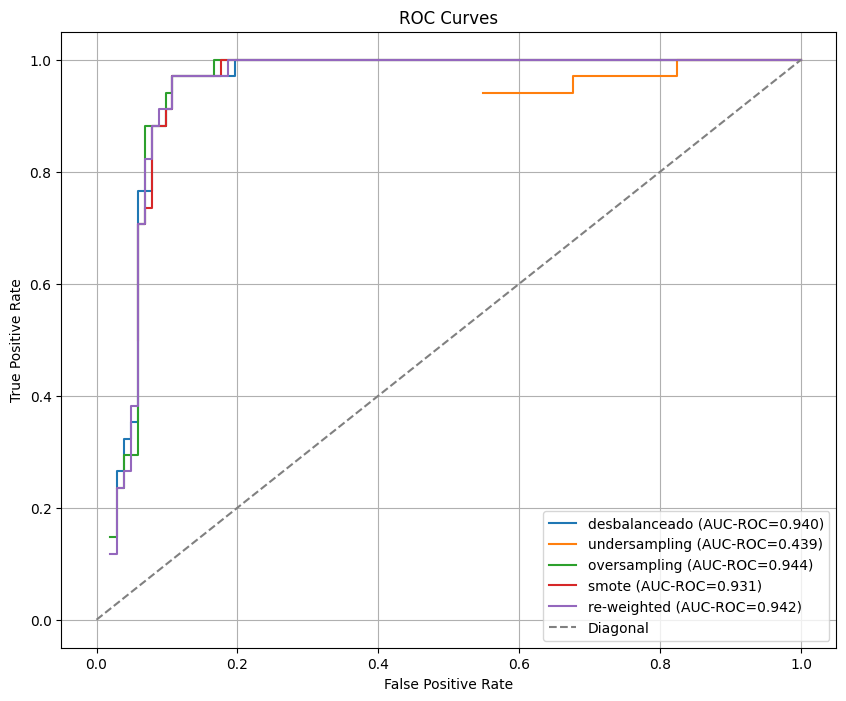

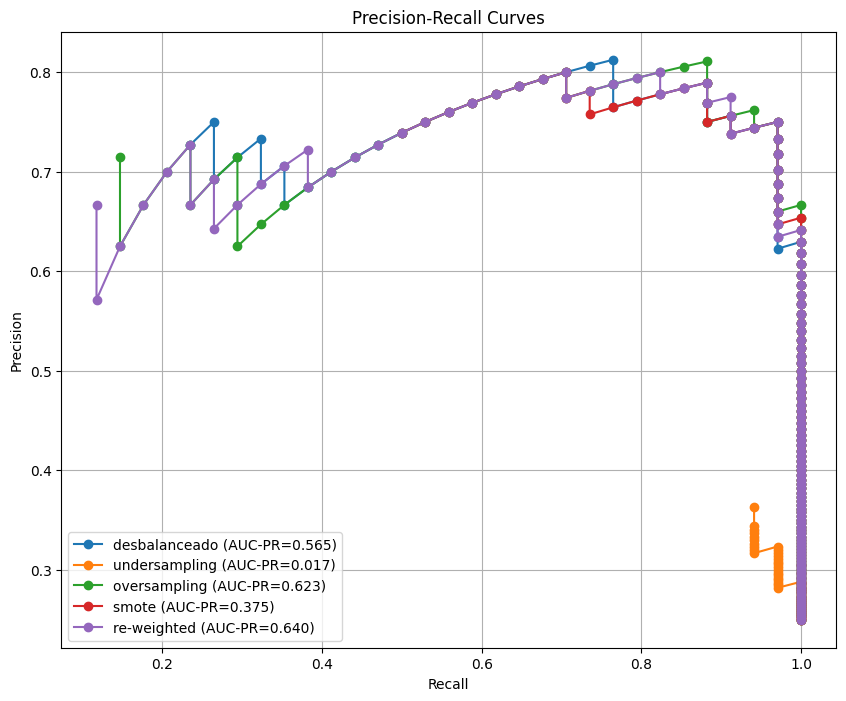

Performance Metrics for each model:
               Accuracy  Precision    Recall  F1 Score   AUC-ROC    AUC-PR
desbalanceado  0.875000   0.793103  0.676471  0.730159  0.940023  0.564656
undersampling  0.316176   0.267717  1.000000  0.422360  0.439158  0.017458
oversampling   0.786765   0.692308  0.264706  0.382979  0.943772  0.623076
smote          0.897059   0.750000  0.882353  0.810811  0.930796  0.374872
re-weighted    0.779412   0.700000  0.205882  0.318182  0.941897  0.640357


In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model_results = {
    "desbalanceado": {
        "y_pred": y_pred_test_imbalanced,
        "y_scores": y_scores_test_imbalanced
    },
    "undersampling": {
        "y_pred": y_pred_test_undersampled,
        "y_scores": y_scores_test_undersampled
    },
    "oversampling": {
        "y_pred": y_pred_test_oversampled,
        "y_scores": y_scores_test_oversampled
    },
    "smote": {
        "y_pred": y_pred_test_smote,
        "y_scores": y_scores_test_smote
    },
    "re-weighted": {
        "y_pred": y_pred_test_re_weighted,
        "y_scores": y_scores_test_re_weighted
    },
}
# Diccionario para almacenar las métricas escalares para cada modelo
metrics_table = {}

# Preparar el plot para las curvas ROC
plt.figure(figsize=(10, 8))
for model_name, results in model_results.items():
    y_pred = results["y_pred"]
    y_scores = results["y_scores"]
    
    # Calcular métricas escalares
    acc = compute_accuracy(y_test_imbalanced_final, y_pred)
    prec = compute_precision(y_test_imbalanced_final, y_pred)
    rec = compute_recall(y_test_imbalanced_final, y_pred)
    f1 = compute_f1(y_test_imbalanced_final, y_pred)
    
    # Calcular curva ROC y AUC-ROC
    fpr, tpr, _ = compute_roc_curve(y_test_imbalanced_final, y_scores)
    auc_roc = compute_auc(fpr, tpr)
    
    # Calcular curva Precision-Recall y AUC-PR
    precision_curve, recall_curve, _ = compute_precision_recall_curve(y_test_imbalanced_final, y_scores)
    auc_pr = compute_auc(recall_curve, precision_curve)
    
    # Guardar las métricas en la tabla
    metrics_table[model_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC-ROC": auc_roc,
        "AUC-PR": auc_pr
    }
    
    # Graficar la curva ROC del modelo
    plt.plot(fpr, tpr, label=f"{model_name} (AUC-ROC={auc_roc:.3f})")
    
# Agregar la línea diagonal de referencia (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Diagonal")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

# Preparar el plot para las curvas Precision-Recall
plt.figure(figsize=(10, 8))
for model_name, results in model_results.items():
    y_scores = results["y_scores"]
    precision_curve, recall_curve, _ = compute_precision_recall_curve(y_test_imbalanced_final, y_scores)
    auc_pr = compute_auc(recall_curve, precision_curve)
    plt.plot(recall_curve, precision_curve, '-o', label=f"{model_name} (AUC-PR={auc_pr:.3f})")
    
# Si se desea, se puede agregar una línea base (por ejemplo, la prevalencia de la clase positiva)
prevalence = np.mean(y_test_imbalanced_final)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.grid(True)
plt.show()

# Crear y mostrar la tabla de métricas
df_metrics = pd.DataFrame(metrics_table).T  # transponer para que cada fila sea un modelo
print("Performance Metrics for each model:")
print(df_metrics)

In [ ]:
import pandas as pd

ruta_dev =r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema2\Data\WAR_class_dev.csv"
ruta_test = r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema2\Data\WAR_class_test.csv"

# Cargar datasets
data_dev = pd.read_csv(ruta_dev)
data_test = pd.read_csv(ruta_test)

# Visualizar primeras filas
print(data_dev.head())

# Distribución de la variable objetivo
print(data_dev['war_class'].value_counts())


          poss           mp  raptor_total  war_total  pace_impact  war_class
0  2283.468774   826.890427     -3.369325  -0.006893     0.472195          2
1  1185.081598   567.265296     -5.389056  -0.615802     1.567405          2
2  5272.362761  2403.044668      7.084319  11.688727    -0.534305          3
3  7594.083790  3709.114977      5.532538  14.739138    -0.710111          3
4  8479.653469  3803.026613      5.089253  15.920002    -0.699135          3
war_class
2    2509
3    2244
1    2029
Name: count, dtype: int64


Primeras filas del dataset:
          poss           mp  raptor_total  war_total  pace_impact  war_class
0  2283.468774   826.890427     -3.369325  -0.006893     0.472195          2
1  1185.081598   567.265296     -5.389056  -0.615802     1.567405          2
2  5272.362761  2403.044668      7.084319  11.688727    -0.534305          3
3  7594.083790  3709.114977      5.532538  14.739138    -0.710111          3
4  8479.653469  3803.026613      5.089253  15.920002    -0.699135          3

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6782 entries, 0 to 6781
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poss          6782 non-null   float64
 1   mp            6782 non-null   float64
 2   raptor_total  6782 non-null   float64
 3   war_total     6782 non-null   float64
 4   pace_impact   6782 non-null   float64
 5   war_class     6782 non-null   int64  
dtypes: float64(5), int64(

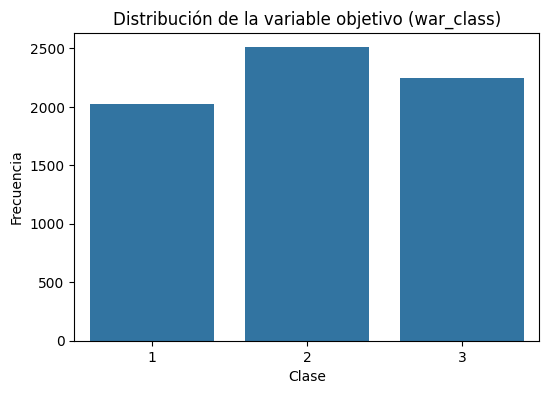

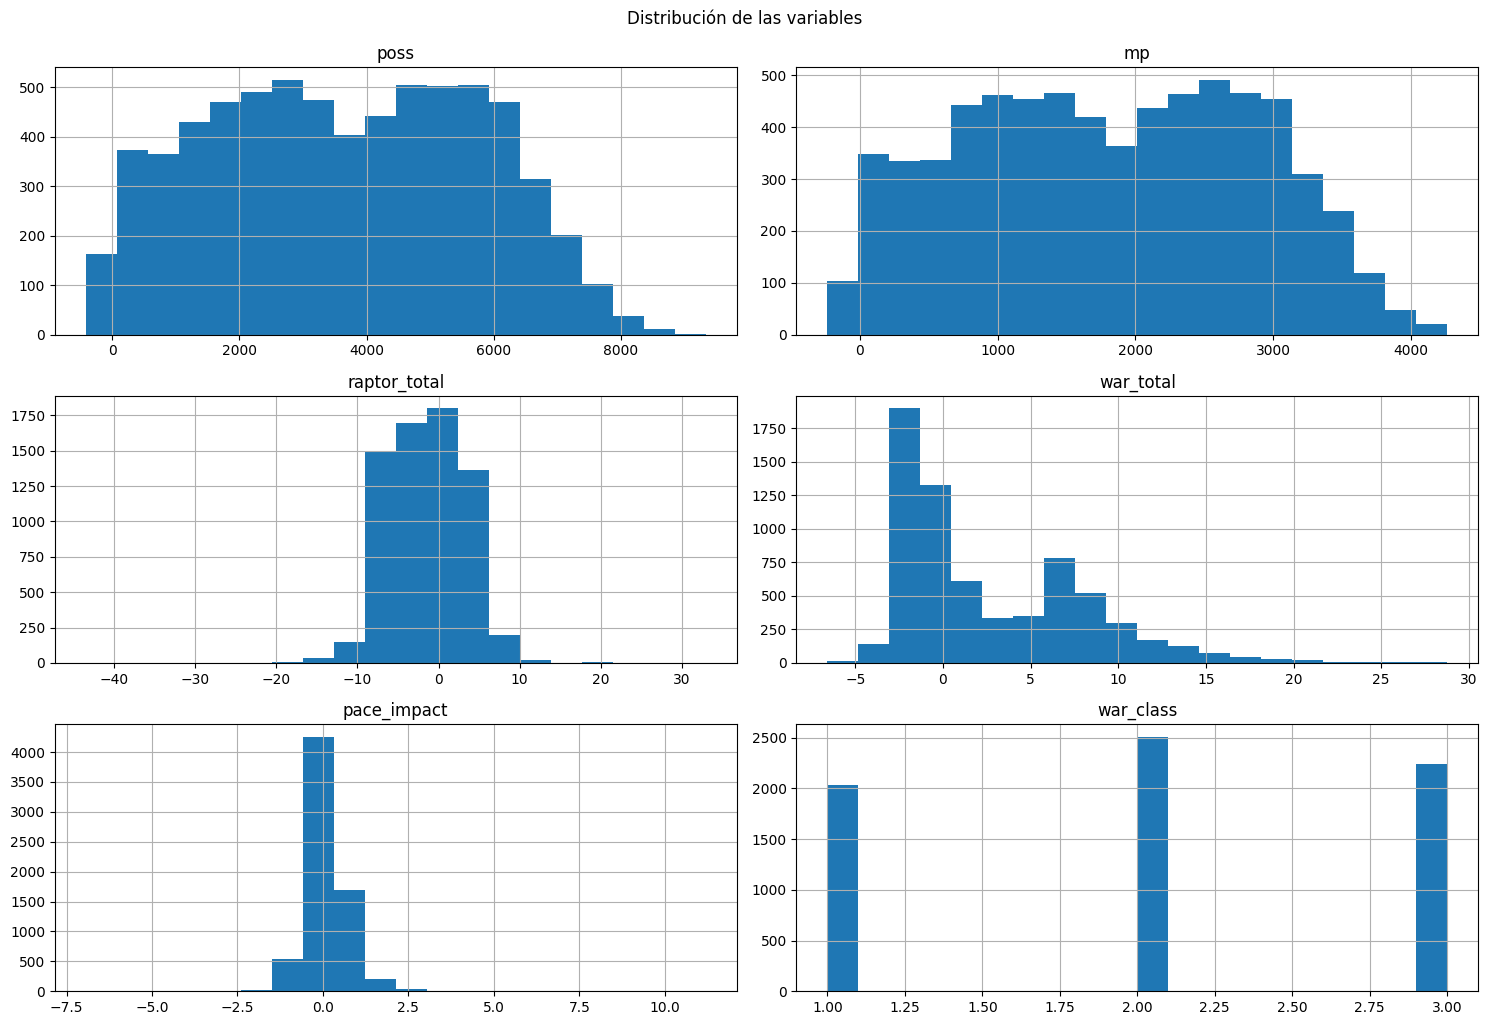

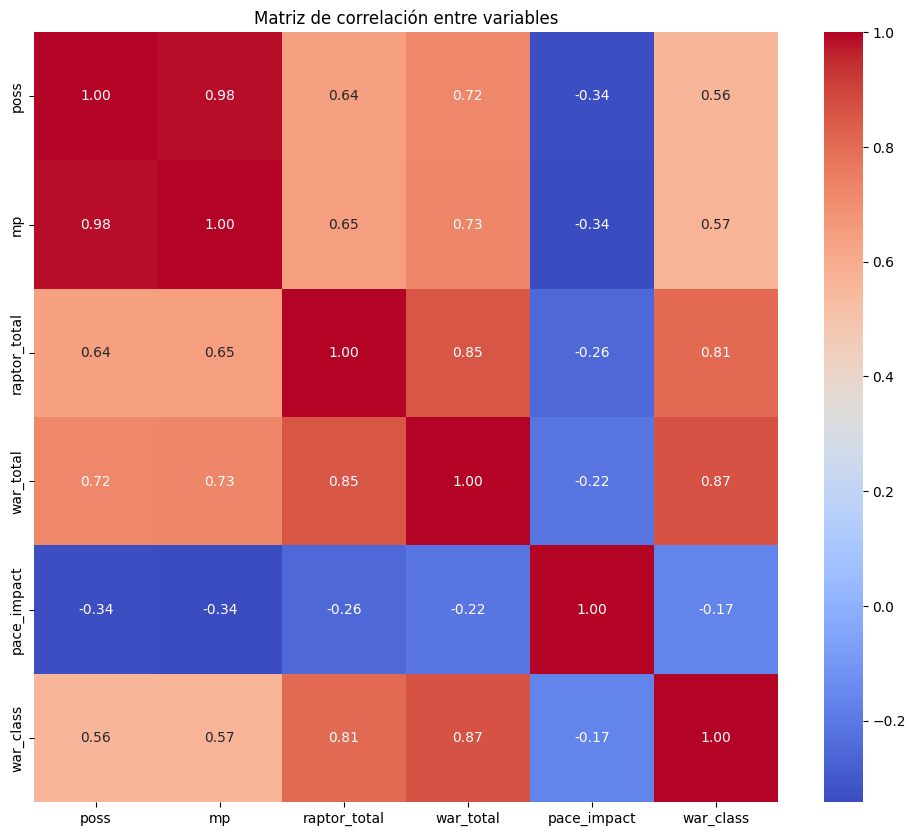

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Visualizar las primeras filas y obtener información general
print("Primeras filas del dataset:")
print(data_dev.head())

print("\nInformación general del dataset:")
print(data_dev.info())

print("\nEstadísticas descriptivas:")
print(data_dev.describe())

# 3. Verificar la presencia de valores faltantes (NaN)
print("\nValores faltantes por columna:")
print(data_dev.isnull().sum())

# 4. Verificar la presencia de datos duplicados
print("\nCantidad de filas duplicadas:")
print(data_dev.duplicated().sum())

# 5. Analizar la distribución de la variable objetivo 'war_class'
plt.figure(figsize=(6, 4))
sns.countplot(data=data_dev, x='war_class')
plt.title("Distribución de la variable objetivo (war_class)")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

# 6. Visualizar la distribución de las variables numéricas
data_dev.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.suptitle("Distribución de las variables", y=1.02)
plt.show()

# 7. Analizar correlaciones entre los features
# Se asume que la variable objetivo es 'war_class' y los demás son features numéricos
# Si hay variables categóricas adicionales, habría que tratarlas previamente
plt.figure(figsize=(12, 10))
corr_matrix = data_dev.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación entre variables")
plt.show()
